In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv('Blood.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   748 non-null    int64
 1   F1      748 non-null    int64
 2   F2      748 non-null    int64
 3   F3      748 non-null    int64
 4   F4      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [64]:
X_features = df[['F1', 'F2', 'F3', 'F4']]
Y_features = df['class']
X = sm.add_constant(X_features)
Y = Y_features

train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.8, random_state=42) 
from sklearn.tree import DecisionTreeClassifier 
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 6 )

In [65]:
clf_tree.fit( train_X, train_Y )

DecisionTreeClassifier(max_depth=6)

In [66]:
from sklearn.metrics import roc_auc_score
tree_predict = clf_tree.predict( test_X )
roc_auc_score( test_Y, tree_predict )

0.5864625687634537

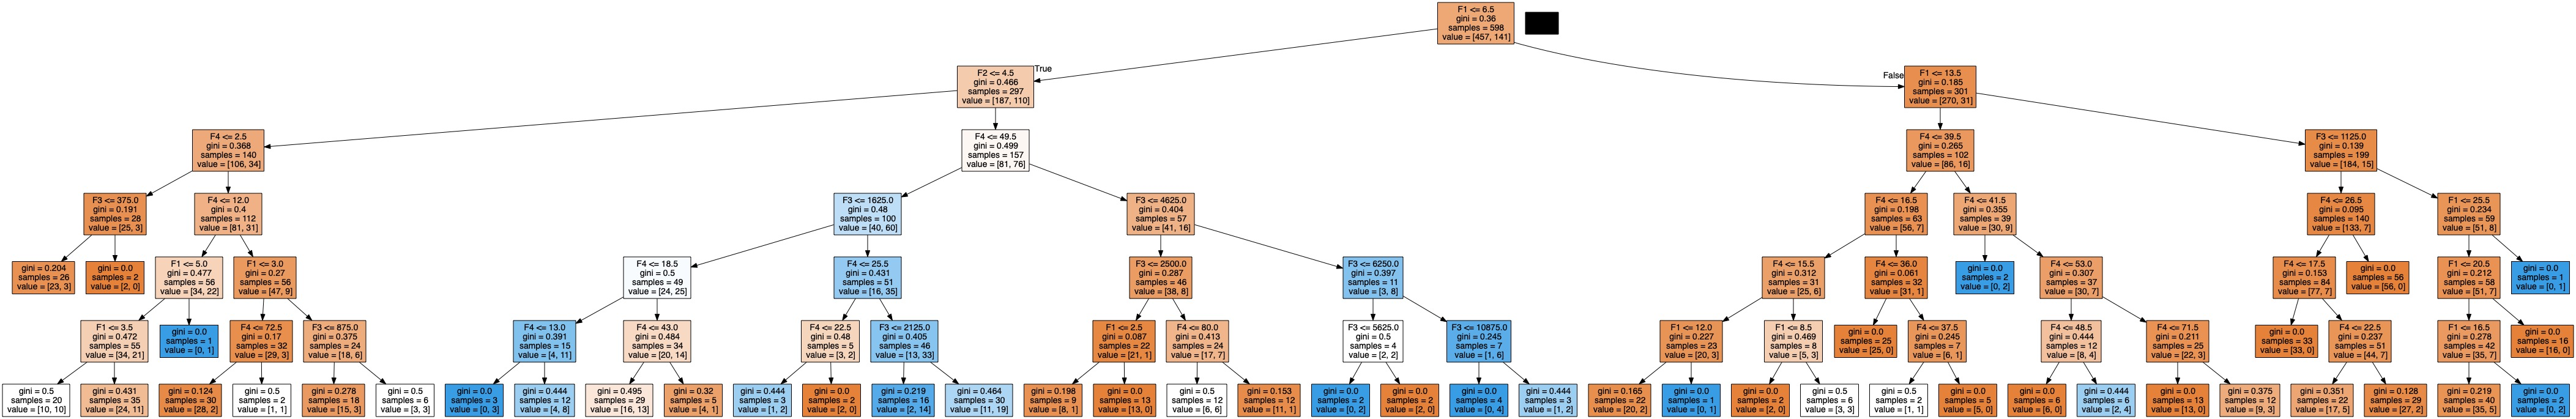

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
# Export the tree into odt file
export_graphviz( clf_tree,
                  out_file = "chd_tree.odt",
                  feature_names = train_X.columns,
                  filled = True )
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )
# Render the png file
Image(filename='chd_tree.png')

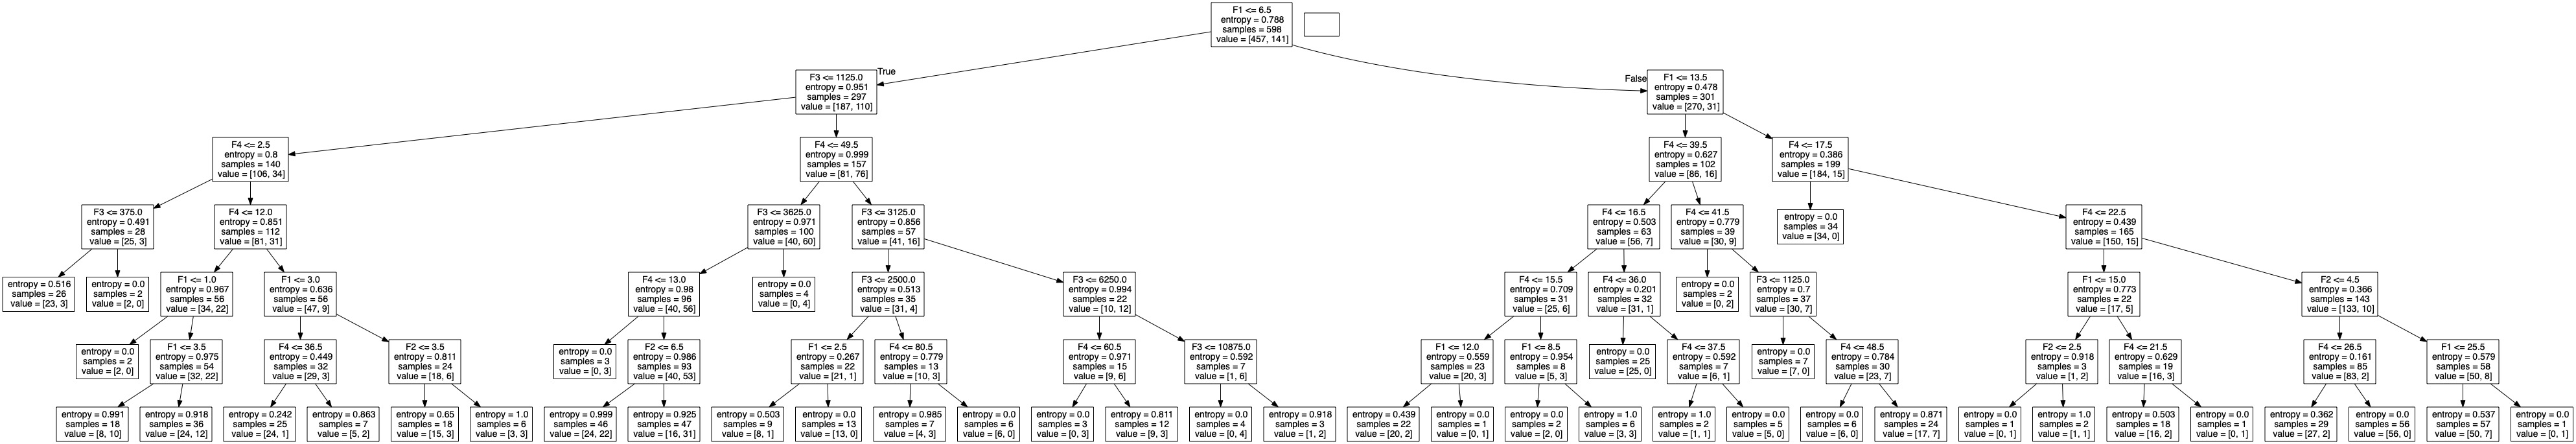

In [88]:
 clf_tree_entropy = DecisionTreeClassifier( criterion = "entropy",max_depth=6)
clf_tree_entropy.fit( train_X, train_Y )
# Export the tree into odt file
export_graphviz( clf_tree_entropy,out_file = 'chd_tree_entropy.odt',
                  feature_names = train_X.columns )
 # Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree_entropy.odt')
chd_tree_graph.write_jpg ( 'chd_tree_entropy.png' )
 # Render the png file
Image(filename='chd_tree_entropy.png')

In [79]:
tree_predict = clf_tree_entropy.predict( test_X )
roc_auc_score( test_Y, tree_predict )

0.5638603204974886

In [84]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'],
                      'max_depth': range(2,10)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,
       tuned_parameters,
       cv=10,
       scoring='roc_auc')
clf.fit(train_X, train_Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [85]:
clf.best_score_

0.7200461237635151

In [86]:
 clf.best_params_

{'criterion': 'entropy', 'max_depth': 2}

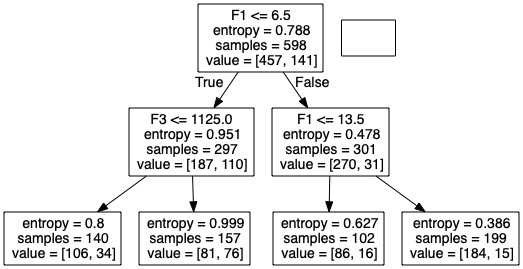

In [87]:
 clf_tree_entropy = DecisionTreeClassifier( criterion = "entropy",max_depth=2)
clf_tree_entropy.fit( train_X, train_Y )
# Export the tree into odt file
export_graphviz( clf_tree_entropy,out_file = 'chd_tree_entropy.odt',
                  feature_names = train_X.columns )
 # Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree_entropy.odt')
chd_tree_graph.write_jpg ( 'chd_tree_entropy.png' )
 # Render the png file
Image(filename='chd_tree_entropy.png')

In [73]:
tree_predict = clf_tree_entropy.predict( test_X )
roc_auc_score( test_Y, tree_predict )

0.5